In [257]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


w_init = np.array([1,1,1,1])
b_init = 0
ALPHA = 0.1
LAMBDA = 0.6
MAX_ITER = 1000

class BinaryLogisticPredictor:

    def __init__(self, alpha, lambda_param, max_iter, w_init, b_init):
        self.alpha = alpha
        self.max_iter = max_iter
        self.w = w_init
        self.b = b_init
        self.lambda_param = lambda_param

    def set_train_data(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def get_predicts(self, x, w, b):
        z = np.dot(x, w) + b
        return (1 / (1 + np.exp(-z)))
 
    def fit_step(self, x, y, w, b, alpha):
        y_pred = self.get_predicts(x, w, b)
        y_diff = np.subtract(y_pred, y)
        dw = np.dot(x.T, y_diff) / len(x)
        dw = np.add(dw, 2*self.lambda_param*w/len(x)) #L2 regularization
        db = np.sum(y_diff) / len(x)
        w_new = np.subtract(w, alpha*dw)
        b_new = np.subtract(b, alpha*db)
        return (y_pred, w_new, b_new)

    def y_decider(self, y_pred):
        decider = lambda y: 1 if y > 0.5 else 0
        return np.array([decider(y) for y in y_pred])

    def fit(self):
        #print("True values of y: ", self.y_train)
        iter = 0
        while (iter < self.max_iter):
            (y_pred, self.w, self.b) = self.fit_step(self.X_train, self.y_train, self.w, self.b, self.alpha)
            iter += 1
        #print("Fitted y vals: ", y_pred)
        return self
    
    def predict(self, x):
        return self.get_predicts(x, self.w, self.b)


class BLPCombiner:
    def __init__(self, blps):
        self.blps = blps 

    def fit(self):
        [blp.fit() for blp in self.blps]


    def predict(self, x):
        all_y_pred = np.array([blp.predict(x) for blp in self.blps])
        return np.argmax(all_y_pred, axis=0)


def main():

    X_iris, y_iris = datasets.load_iris(return_X_y=True)
    X_scaled = StandardScaler().fit_transform(X_iris)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_iris, test_size=0.2)

    ohe = OneHotEncoder()
    y_encoded = ohe.fit_transform(y_train.reshape(-1, 1)).toarray()
    (y1_train, y2_train, y3_train) = (y_encoded[:,0], y_encoded[:,1], y_encoded[:,2])

    blp1 = BinaryLogisticPredictor(ALPHA, LAMBDA, MAX_ITER, w_init, b_init)
    blp1.set_train_data(X_train, y1_train)
    blp2 = BinaryLogisticPredictor(ALPHA, LAMBDA, MAX_ITER, w_init, b_init)
    blp2.set_train_data(X_train, y2_train)
    blp3 = BinaryLogisticPredictor(ALPHA, LAMBDA, MAX_ITER, w_init, b_init)
    blp3.set_train_data(X_train, y3_train)

    blpc = BLPCombiner([blp1, blp2, blp3])
    blpc.fit()
    y_pred = blpc.predict(X_test)
    print(y_pred)
    print(y_test)
    print(f1_score(y_test, y_pred, average='macro'))
    print(classification_report(y_test, y_pred))

main()

[2 1 0 1 2 2 1 2 0 2 0 0 0 1 2 0 2 0 1 0 0 2 2 2 1 2 2 2 0 1]
[2 1 0 2 1 2 1 2 0 1 0 0 0 1 2 0 2 0 1 0 0 2 2 2 1 2 2 2 0 1]
0.8933333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.86      0.75      0.80         8
           2       0.85      0.92      0.88        12

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


w_init = np.array([[1,1,1], [1,1,1], [1,1,1], [1,1,1]])
b_init = np.array([0,0,0])
ALPHA = 0.2
LAMBDA = 0.6
MAX_ITER = 1000

class BinaryLogisticSoftMax:

    def __init__(self, alpha, lambda_param, max_iter, w_init, b_init):
        self.alpha = alpha
        self.max_iter = max_iter
        self.w = w_init
        self.b = b_init
        self.lambda_param = lambda_param

    def set_train_data(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def get_predicts(self, x, w, b):
        z = np.dot(x, w) + b
        y = np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
        return y
        #return (1 / (1 + np.exp(-z)))
 
    def fit_step(self, x, y, w, b, alpha):
        y_pred = self.get_predicts(x, w, b)
        y_diff = np.subtract(y_pred, y)
        dw = np.dot(x.T, y_diff) / len(x)
        dw = np.add(dw, 2*self.lambda_param*w/len(x)) #L2 regularization
        db = np.sum(y_diff) / len(x)
        w_new = np.subtract(w, alpha*dw)
        b_new = np.subtract(b, alpha*db)
        return (y_pred, w_new, b_new)


    def fit(self):
        #print("True values of y: ", self.y_train)
        iter = 0
        while (iter < self.max_iter):
            (y_pred, self.w, self.b) = self.fit_step(self.X_train, self.y_train, self.w, self.b, self.alpha)
            iter += 1
        #print("Fitted y vals: ", y_pred)
        return self
    
    def predict(self, x):
        return np.argmax(self.get_predicts(x, self.w, self.b), axis=1)


def main():

    X_iris, y_iris = datasets.load_iris(return_X_y=True)
    X_scaled = StandardScaler().fit_transform(X_iris)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_iris, test_size=0.2)

    ohe = OneHotEncoder()
    y_encoded = ohe.fit_transform(y_train.reshape(-1, 1)).toarray()

    blp = BinaryLogisticSoftMax(ALPHA, LAMBDA, MAX_ITER, w_init, b_init)
    blp.set_train_data(X_train, y_encoded)
    blp.fit()

    y_pred = blp.predict(X_test)
    print(y_pred)
    print(y_test)
    print(f1_score(y_test, y_pred, average='macro'))
    print(classification_report(y_test, y_pred))

main()

[0 1 0 1 2 2 0 0 1 2 2 2 0 0 0 1 2 2 0 2 1 0 2 2 2 2 2 0 2 0]
[0 1 0 1 2 2 0 0 1 2 2 2 0 0 0 1 2 2 0 1 1 0 2 2 1 2 2 0 2 0]
0.9188034188034188
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.71      0.83         7
           2       0.86      1.00      0.92        12

    accuracy                           0.93        30
   macro avg       0.95      0.90      0.92        30
weighted avg       0.94      0.93      0.93        30



['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Fitted in 10302 iterations
delta is still:  0.09999198071482675


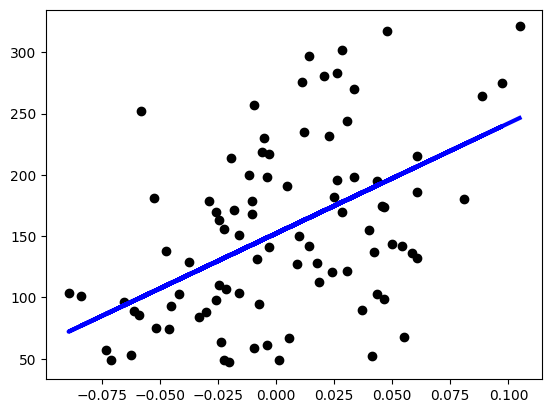

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split


w_init = np.array([1])
b_init = 0
ALPHA = 0.1
LAMBDA = 0.6
MAX_ITER = 20000

class LinearRegression:

    def __init__(self, X, y, alpha, lambda_param, max_iter, w_init, b_init, tolerance=0.1, random_state=0, test_size=0.2):
        self.alpha = alpha
        self.max_iter = max_iter
        self.w = np.append(w_init, b_init)
        self.lambda_param = lambda_param
        self.tolerance = tolerance
        X = np.append(X, np.ones((len(X), 1)), axis=1) # add col of 1s to X data (for bias multiplication later)
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, test_size=test_size)
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def get_predicts(self, x, w):
        z = np.dot(x, w)
        return z
 
    def fit_step(self, x, y, w, alpha):
        y_pred = self.get_predicts(x, w)
        y_diff = np.subtract(y_pred, y)
        dw = np.dot(x.T, y_diff) / len(x)
        #dw = np.add(dw, 2*self.lambda_param*w/len(x)) #L2 regularization
        w_new = np.subtract(w, alpha*dw)
        return (y_pred, w_new, dw)


    def fit(self):
        #print("True values of y: ", self.y_train)
        iter = 0
        delta = 10000000.0
        while ((iter < self.max_iter) and (delta > self.tolerance)):
            (y_pred, self.w, dw) = self.fit_step(self.X_train, self.y_train, self.w, self.alpha)
            iter += 1
            delta = np.mean(np.abs(dw))
        #print("Fitted y vals: ", y_pred)
        print("Fitted in %d iterations"%iter)
        print("delta is still: ", delta)
        return self

    def predict(self):
        return self.get_predicts(self.X_test, self.w)

def main():
    data = datasets.load_diabetes()
    print(data.feature_names)
    X = data.data
    y = data.target
    X = X[:, np.newaxis, 2]

    lr = LinearRegression(X, y, ALPHA, LAMBDA, MAX_ITER, w_init, b_init)
    lr.fit()

    y_pred = lr.predict()
    y_test = lr.y_test
    X_test = lr.X_test[:, np.newaxis, 0]
    plt.scatter(X_test, y_test, color="black")
    plt.plot(X_test, y_pred, color="blue", linewidth=3)
    plt.xticks()
    plt.yticks()
    plt.show()

main()